<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Sarina Heshmati


In [2]:
student_number = "401106096"
full_name = "Radin Shahdaei"
assert student_number and full_name is not None, 'please input your information'

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")

## Overview

In this assignment, you will explore a dataset containing information about employees and use that data to train models capable of predicting whether those employees have left the company (attrited) or not. You will start by exploring the dataset, analyzing its features, and performing necessary preprocessing steps (such as label encoding and scaling). Then, you will build and evaluate implementations of K-Nearest Neighbors (KNN) as well as Random Forest, Bagging, and AdaBoost classifiers. After training and tuning each model, you’ll compare their performance using metrics like accuracy and feature importance to identify the best approach for accurate attrition prediction.

# Load and Explore Dataset (10 points)

In [7]:
import pandas as pd

# Load the dataset
# "Attrition" is our target columm

df = pd.read_csv('dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


Explore the dataset and get familiar with its features and statistics. (don't worry about the 'masked values' in our target column. They are simply used to automatically test your model later on.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       902 non-null    int64 
 1   Attrition                 902 non-null    object
 2   BusinessTravel            902 non-null    object
 3   DailyRate                 902 non-null    int64 
 4   Department                902 non-null    object
 5   DistanceFromHome          902 non-null    int64 
 6   Education                 902 non-null    int64 
 7   EducationField            902 non-null    object
 8   EmployeeCount             902 non-null    int64 
 9   EmployeeNumber            902 non-null    int64 
 10  EnvironmentSatisfaction   902 non-null    int64 
 11  Gender                    902 non-null    object
 12  HourlyRate                902 non-null    int64 
 13  JobInvolvement            902 non-null    int64 
 14  JobLevel                  

<ipython-input-8-d35180bf7ce0>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette="viridis")


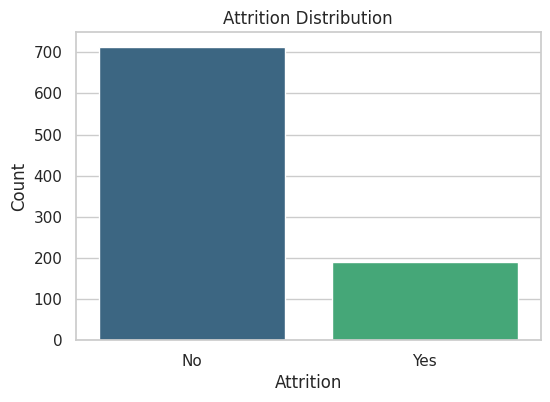

In [8]:
df.info()
df.describe()

# Check for any missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Explore the target variable (binary classification)
attrition_counts = df['Attrition'].value_counts()
print("Attrition value counts:\n", attrition_counts)

# Visualize the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette="viridis")
plt.title("Attrition Distribution")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()


It is generally better to remove columns with only one unique value from a DataFrame when preparing data for a decision tree. <br>
Such columns do not provide any useful information for splitting the data and can lead to unnecessary complexity in the model. Remove the said columns from the DataFrame.

In [9]:
# Measure and print the number of unique values for each column
unique_values = {col: df[col].nunique() for col in df.columns}
print("Number of unique values per column:\n", unique_values)

# Identify columns with less than 2 unique values and remove them
columns_to_drop = [col for col, count in unique_values.items() if count < 2]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

print("Columns removed:", columns_to_drop)

Number of unique values per column:
 {'Age': 42, 'Attrition': 2, 'BusinessTravel': 3, 'DailyRate': 653, 'Department': 3, 'DistanceFromHome': 29, 'Education': 5, 'EducationField': 6, 'EmployeeCount': 1, 'EmployeeNumber': 902, 'EnvironmentSatisfaction': 4, 'Gender': 2, 'HourlyRate': 71, 'JobInvolvement': 4, 'JobLevel': 5, 'JobRole': 9, 'JobSatisfaction': 4, 'MaritalStatus': 3, 'MonthlyIncome': 853, 'MonthlyRate': 888, 'NumCompaniesWorked': 10, 'Over18': 1, 'OverTime': 2, 'PercentSalaryHike': 15, 'PerformanceRating': 2, 'RelationshipSatisfaction': 4, 'StandardHours': 1, 'StockOptionLevel': 4, 'TotalWorkingYears': 40, 'TrainingTimesLastYear': 7, 'WorkLifeBalance': 4, 'YearsAtCompany': 34, 'YearsInCurrentRole': 19, 'YearsSinceLastPromotion': 16, 'YearsWithCurrManager': 17}
Columns removed: ['EmployeeCount', 'Over18', 'StandardHours']


Look at the DataFrame and try to gather insight into people's monthly income and things that generally affect this number.

<ipython-input-11-12db8a0ecbb4>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='YearsAtCompany', y='MonthlyIncome', estimator='mean', ci=None)


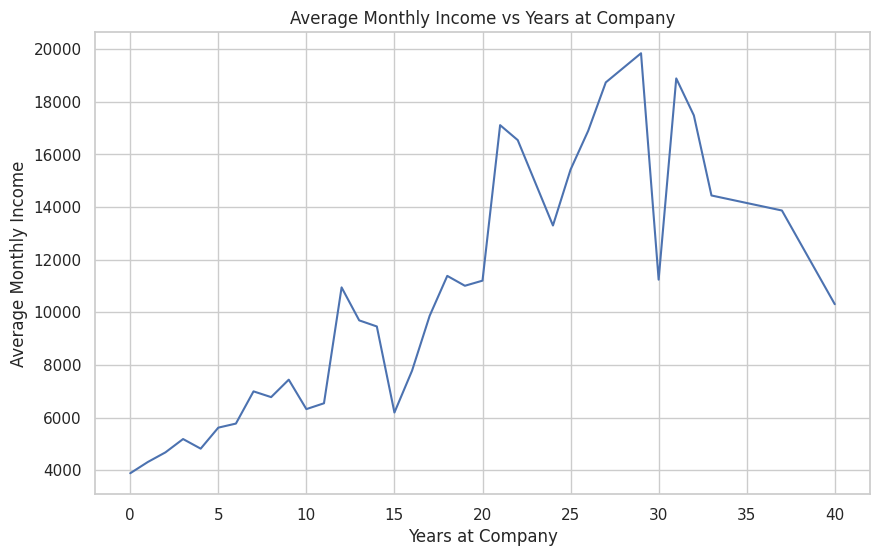

Department with highest average income: Sales : 6817.394366197183
Department with lowest average income: Research & Development : 6073.644444444444


In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YearsAtCompany', y='MonthlyIncome', estimator='mean', ci=None)
plt.title("Average Monthly Income vs Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Average Monthly Income")
plt.show()

avg_income_by_department = df.groupby('Department')['MonthlyIncome'].mean()
highest_income_department = avg_income_by_department.idxmax()
lowest_income_department = avg_income_by_department.idxmin()

print("Department with highest average income:", highest_income_department, ":", avg_income_by_department[highest_income_department])
print("Department with lowest average income:", lowest_income_department, ":", avg_income_by_department[lowest_income_department])


# Data Preprocessing (5 points)

Label Encode categorical columns and create a new DataFrame. Then split this data into train and test.

In [12]:
from sklearn.preprocessing import LabelEncoder

encoded_df = df.copy()
label_encoders = {}

for col in encoded_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le

print("Label encoding completed. Encoded dataframe head:")
encoded_df.head()

Label encoding completed. Encoded dataframe head:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,0,2,592,1,7,3,1,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,34,0,2,1326,2,3,3,4,1478,4,...,3,4,0,15,2,3,13,9,3,12
2,27,0,2,954,2,9,3,2,1965,4,...,3,1,0,7,5,3,7,7,0,7
3,32,0,2,929,2,10,3,2,722,4,...,3,4,0,10,2,2,10,7,0,8
4,50,0,1,1234,1,20,5,3,1606,2,...,3,3,1,32,3,3,30,8,12,13


In [14]:
X = encoded_df.drop(columns=['Attrition'])
y = encoded_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train-test split and scaling completed.")


Train-test split and scaling completed.


# K-Nearest Neighbors (KNN) Model (15 points)

Implement KNN model from scratch.

In [17]:
import numpy as np
from collections import Counter

class CustomKNN:
    def __init__(self, k):

        self.k = k

    def fit(self, X_train, y_train):

        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def euclidean_distance(self, x1, x2):

        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):

        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):

        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_indices]

        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]



Fit and test your model using different k values and then choose the best one.

In [18]:

k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []


for k in k_values:
    model = CustomKNN(k=k)

    model.fit(X_train, y_train)

    y_pred_custom = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred_custom)
    accuracies.append(accuracy)

    print(f'k: {k} - Accuracy: {accuracy}')

best_k_index = np.argmax(accuracies)
bestk = k_values[best_k_index]
Best_custom_model = CustomKNN(k=bestk)
Best_custom_model.fit(X_train, y_train)

print(f'\nBest k: {bestk} - Accuracy: {accuracies[best_k_index]}')

k: 1 - Accuracy: 0.7527675276752768
k: 3 - Accuracy: 0.7785977859778598
k: 5 - Accuracy: 0.8007380073800738
k: 7 - Accuracy: 0.8044280442804428
k: 9 - Accuracy: 0.8007380073800738
k: 11 - Accuracy: 0.8191881918819188
k: 13 - Accuracy: 0.7933579335793358
k: 15 - Accuracy: 0.8007380073800738

Best k: 11 - Accuracy: 0.8191881918819188


Visualize the confusion matrix for KNN predictions

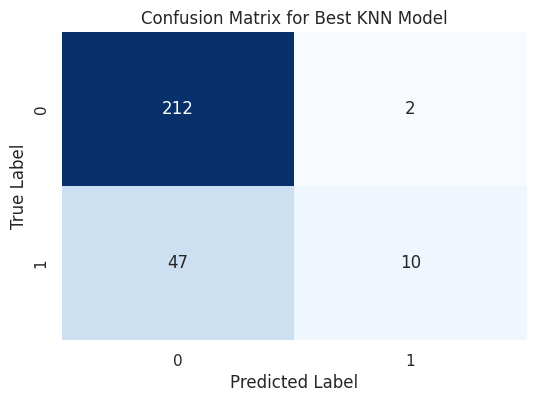

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_best_knn = Best_custom_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_best_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Best KNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Evaluation (30 points)
In this part, we are going to evaluate your model's performance on another set of unseen data. Load test.csv (this data is already encoded), use your best_custom_model to predict and save the results in a DataFrame called 'result.csv'. The DataFrame should contain one column called 'target' that contains your model's predictions.

In [20]:
eval_df = pd.read_csv('test.csv')

X_eval = scaler.transform(eval_df)

y_pred_eval = Best_custom_model.predict(X_eval)

result_df = pd.DataFrame(y_pred_eval, columns=['target'])
result_df.to_csv('result.csv', index=False)

print("Predictions saved to result.csv")

Predictions saved to result.csv


# Random Forest Model (12 points)

Implement a random forest model using sklearn.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up the hyperparameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV with the Random Forest model
rf_cv = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
rf_cv.fit(X_train, y_train)

# Use the best Random Forest model for predictions on the test data
y_pred_rf = rf_cv.best_estimator_.predict(X_test)

# Print the Random Forest model accuracy and classification report
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nBest Parameters:", rf_cv.best_params_)

Random Forest Model Accuracy: 0.8191881918819188

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       214
           1       0.68      0.26      0.38        57

    accuracy                           0.82       271
   macro avg       0.76      0.62      0.64       271
weighted avg       0.80      0.82      0.79       271


Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


Visualize the confusion matrix for Random Forest predictions

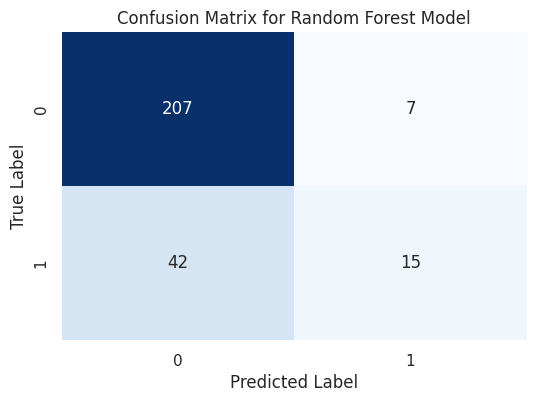

In [22]:
# Generate the confusion matrix for Random Forest predictions
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

A feature importance plot is a visual representation that illustrates the significance of each feature (or variable) in a machine learning model, particularly in the context of supervised learning tasks like classification and regression. Plot the feature importances using a bar plot.

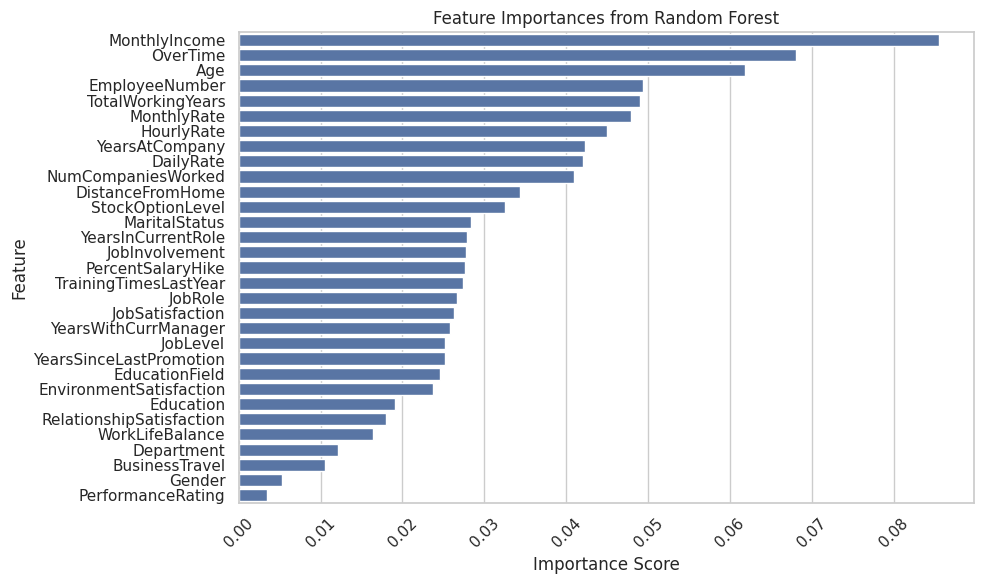

In [23]:
# Get the feature importances from the trained Random Forest model
best_rf = rf_cv.best_estimator_  # Use the best Random Forest model from GridSearchCV
importances = best_rf.feature_importances_

# Sort the indices of the importance values in descending order
indices = np.argsort(importances)[::-1]

# Create a DataFrame with feature names and importance scores
feature_importances_df = pd.DataFrame({
    'Feature': X.columns[indices],
    'Importance': importances[indices]
})

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Bagging with KNN (12 points)

In [24]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize BaggingClassifier with KNeighborsClassifier as the base estimator
bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=bestk), n_estimators=50, random_state=42)

# Fit the BaggingClassifier on the scaled training data
bagging_knn.fit(X_train, y_train)

# Use the trained Bagging model for predictions on the test data
y_pred_bagging_knn = bagging_knn.predict(X_test)

# Print the Bagging KNN model accuracy and classification report
print("Bagging KNN Model Accuracy:", accuracy_score(y_test, y_pred_bagging_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bagging_knn))

Bagging KNN Model Accuracy: 0.8081180811808119

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       214
           1       0.69      0.16      0.26        57

    accuracy                           0.81       271
   macro avg       0.75      0.57      0.57       271
weighted avg       0.79      0.81      0.76       271



Visualize the confusion matrix for Baggin KNN predictions

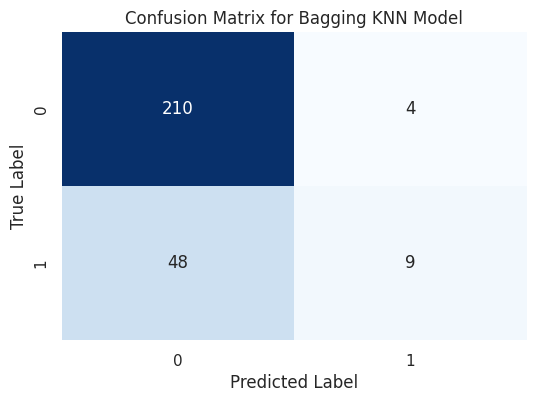

In [25]:
# Generate the confusion matrix for Bagging KNN predictions
conf_matrix_bagging_knn = confusion_matrix(y_test, y_pred_bagging_knn)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_bagging_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Bagging KNN Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# AdaBoost Model (12 points)

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Initialize the AdaBoost model
adaboost = AdaBoostClassifier(random_state=42)

# Set up the hyperparameter grid for tuning
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Set up GridSearchCV with the AdaBoost model
adaboost_cv = GridSearchCV(adaboost, param_grid=param_grid_ada, cv=5, scoring='accuracy')

# Fit the GridSearchCV on the training data
adaboost_cv.fit(X_train, y_train)

# Use the best AdaBoost model for predictions on the test data
y_pred_ada = adaboost_cv.best_estimator_.predict(X_test)

# Print the AdaBoost model accuracy and classification report
print("AdaBoost Model Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))
print("\nBest Parameters:", adaboost_cv.best_params_)


AdaBoost Model Accuracy: 0.8634686346863468

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       214
           1       0.88      0.40      0.55        57

    accuracy                           0.86       271
   macro avg       0.87      0.69      0.74       271
weighted avg       0.87      0.86      0.84       271


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}


Visualize the confusion matrix for AdaBoost predictions

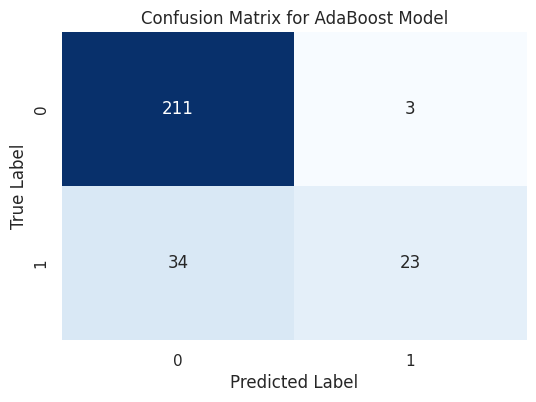

In [28]:
# Generate the confusion matrix for AdaBoost predictions
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ada, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for AdaBoost Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Model Comparison (4 points)

           Model  Accuracy
0            KNN  0.819188
1  Random Forest  0.819188
2    Bagging KNN  0.808118
3       AdaBoost  0.863469


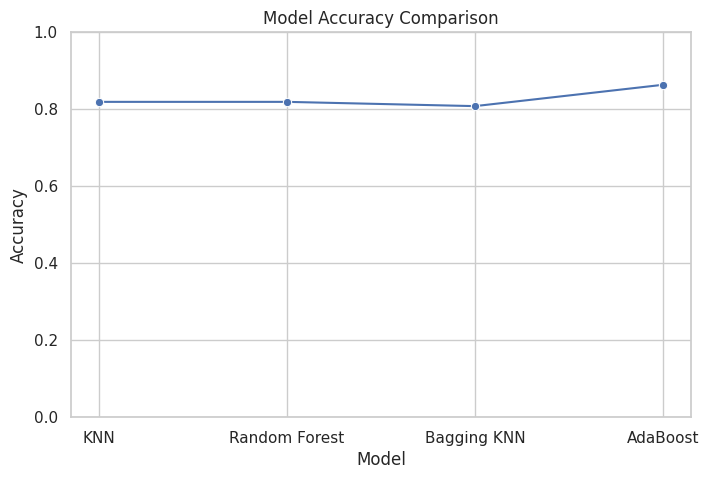

In [29]:
# Collect model names and their respective accuracies
model_names = ["KNN", "Random Forest", "Bagging KNN", "AdaBoost"]
model_accuracies = [
    accuracy_score(y_test, y_pred_best_knn),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_bagging_knn),
    accuracy_score(y_test, y_pred_ada)
]

# Create a DataFrame for model comparison
comparison_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": model_accuracies
})

print(comparison_df)

# Visualize the model comparison
plt.figure(figsize=(8, 5))
sns.lineplot(data=comparison_df, x="Model", y="Accuracy", marker="o")
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis range for better readability
plt.show()
